In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carregar arquivo para um Datafram

df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [15]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [16]:
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [17]:
# Remover coluna id paciente pois ela não é nescessaria para a analise.

df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)


In [25]:
df_exames

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
...,...,...,...,...,...
95,F,52,96,183,89
96,F,68,108,169,105
97,M,21,95,154,125
98,M,41,109,173,128


In [ ]:
# Transformar uma variavel categorica (genero) em numerica, usando One-Hot Encoding

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [29]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

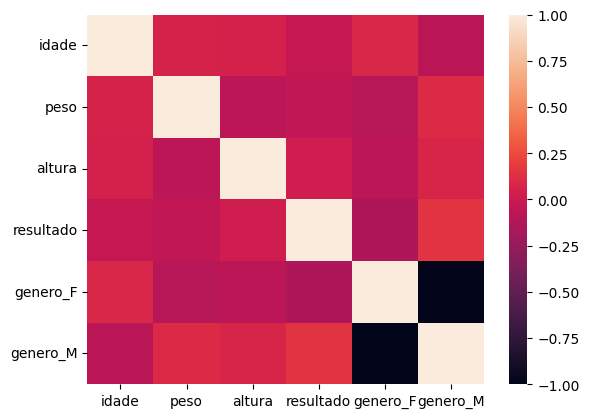

In [30]:
# Apresentar Mapa de Calor de Correlação entre variaveis

sns.heatmap(df_exames.corr())

<Axes: >

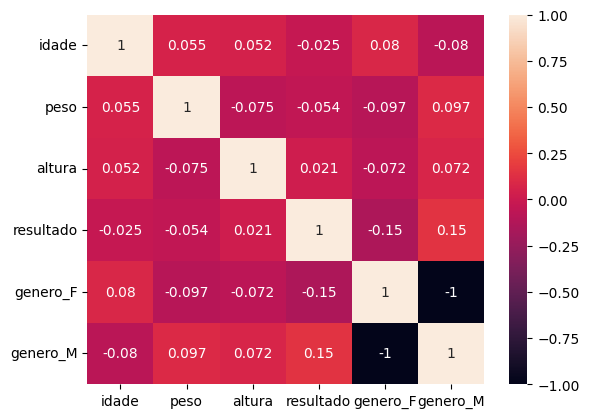

In [ ]:
# Apresentar Mapa de Calor de Correlação entre variaveis com mais detalhes

sns.heatmap(df_exames.corr(),annot=True ,vmin=-1, vmax=1)

<Axes: >

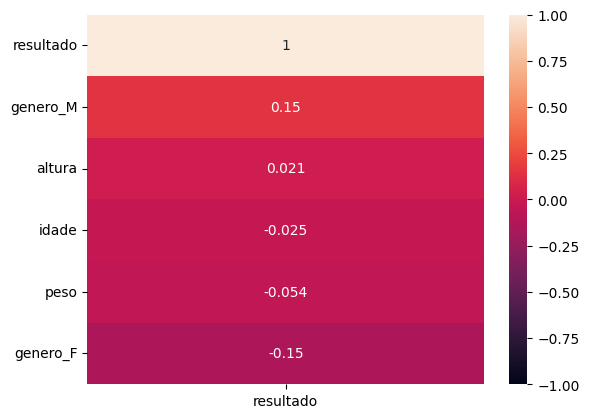

In [33]:
# Mapa de Correlação só com a variável target ( resultado  )

sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False),annot=True ,vmin=-1, vmax=1)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

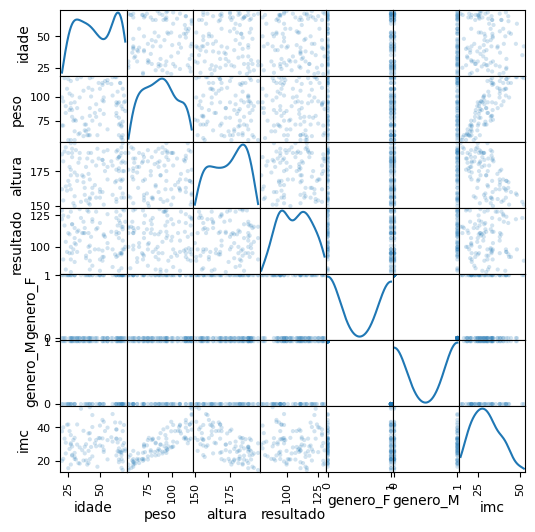

In [43]:
# Plot de Scatter ( Disperssão ) com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

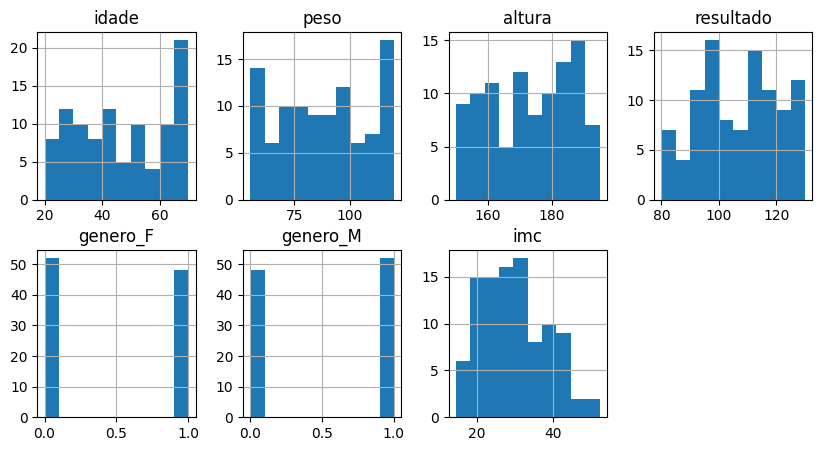

In [45]:
# Histograma de todas as variaveis

df_exames.hist(layout=(2,4), figsize=(10, 5))

In [37]:
# Criar uma feature nova
#IMC ( INDICE DE MASSA CORPORAL)
# IMC = PESO(kg) / ALTURA(m) ^ 2

df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura'] / 100)**2))

In [38]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [39]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


<Axes: >

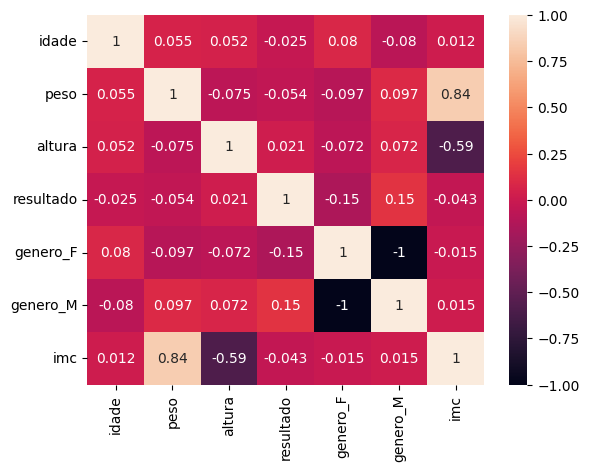

In [40]:
# Apresentar Mapa de Calor de Correlação entre variaveis com mais detalhes
# Com dados atualizados
sns.heatmap(df_exames.corr(),annot=True ,vmin=-1, vmax=1)

<Axes: >

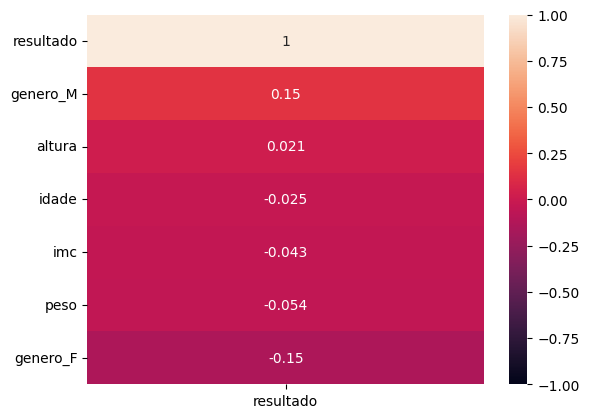

In [41]:
# Mapa de Correlação só com a variável target ( resultado  )
# Com imc
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False),annot=True ,vmin=-1, vmax=1)

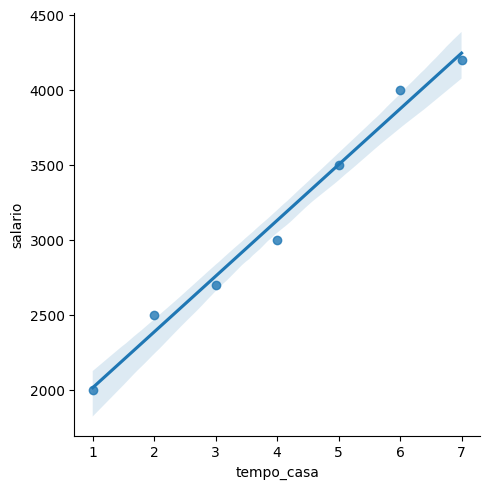

In [46]:
# Exemplo simples de dados
df = pd.DataFrame({
    "tempo_casa": [1, 2, 3, 4, 5, 6, 7],
    "salario": [2000, 2500, 2700, 3000, 3500, 4000, 4200]
})

# Gráfico de regressão
sns.lmplot(x="tempo_casa", y="salario", data=df)


In [48]:
# Importar SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [71]:
# Modelo 1  Sem IMC 

X = df_exames.drop(columns=['imc', 'resultado'])

Y = df_exames['resultado']



In [62]:
#Dividir conjunto entre treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

In [64]:
Y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64

In [65]:
# Treinar o algoritmo de Regressão Linear - Modelo 1

model_1 = LinearRegression().fit(X_train, Y_train)

In [66]:
# Gerar Predições do Conjunto de testes com base no modelo 1

y_pred = model_1.predict(X_test)

In [68]:
# Equação da reta = Regressão Linear
#y = ax + b

model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [69]:
model_1.intercept_

np.float64(94.21133142019875)

In [72]:
model_1.score(X_test, Y_test)

-0.1364090447910642